# Naive Bayes
Real time predictions
Multi class predictions
Text classification, spam filtering, sentiment analysis,
Recomendations systems

Tut p106


For example, an animal may be considered a cheetah
if it is spotted, has four legs, has a tail, and runs at about 70 MPH. A Naïve Bayes
classifier considers that each of these features contributes independently to the
outcome. The outcome refers to the probability that this animal is a cheetah. We
don't concern ourselves with the correlations that may exist between skin patterns,
number of legs, presence of a tail, and movement speed. Let's see how to build a
Naïve Bayes classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from utilities import visualize_classifier

input_file = "data_multivar_nb.txt"

We will be using the file data_multivar_nb.txt as the source data. This file
contains comma-separated values in each line as such: [4.13,5.12,1]  
So in thise case: X=[4.13,5.12], Y = [1]  
So X is variable data, and Y is the classification

In [2]:
data = np.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1]

Create an instance of the Naïve Bayes classifier. We will be using the Gaussian
Naïve Bayes classifier here. In this type of classifier, we assume that the values
associated with each class follow a Gaussian distribution:

In [3]:
# Create NaiveBayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X, Y)

GaussianNB()

Run the classifier on the training data and predict the output:

In [4]:
#predict values for the training data
y_pred = classifier.predict(X)

Let's compute the accuracy of the classifier by comparing the predicted values with
the true labels, and then visualize the performance:

Accuracy of the Naive Bayes classifier =  99.75 %


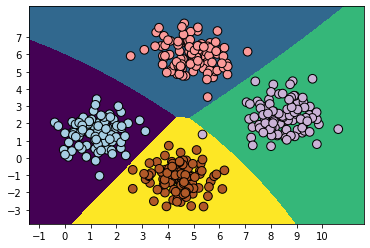

In [5]:
#compute accuracy of the classifier
accuracy = 100.0 * (Y == y_pred).sum() / X.shape[0]
print("Accuracy of the Naive Bayes classifier = ", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier, X, Y)

The preceding method to compute the accuracy of the classifier is not robust. We
need to perform cross-validation, so that we don't use the same training data when
we are testing it.
Split the data into training and testing subsets. As specified by the test_size
parameter in the following line, we will allocate 80% for training and the remaining
20% for testing. We'll then train a Naïve Bayes classifier on this data:

In [6]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

Compute the accuracy of the classifier and visualize the performance:

Accuracy of the new classifier = 100.0 %


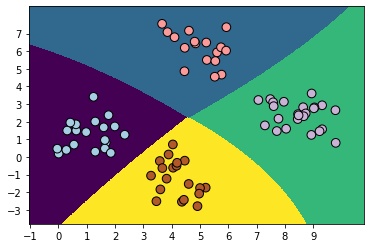

In [7]:
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")
# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)

Let's use the inbuilt functions to calculate the accuracy, precision, and recall values
based on three-fold cross-validation:

In [10]:
num_folds = 3
accuracy_values = cross_val_score(classifier,
X, Y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier,
X, Y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) +
"%")
recall_values = cross_val_score(classifier,
X, Y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier,
X, Y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%
